# Linear and polynomial trends

The custom class LinearTrend from `lineartrend.py` used here is a child class of `sklearn.linear_model.LinearRegression`, inheriting everything from this class. It extends this class with several attributes and methods for easy-to-use modeling and forecasting of time series with linear and polynomial regression models. It requires as input and returns as output pandas series with PeriodIndex. 

### Notes

* Several forecasting models require stationary time series; de-trending is one way to transform a time series to a stationary time series.

### References

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lineartrend import LinearTrend
import tshelper as h

plt.style.use("seaborn-whitegrid")

## Load and prepare data

In [2]:
# Load data
df = pd.read_csv("data/catalog_seasfac.csv",
                 usecols=["date", "men", "women", "jewel", "mail", "page", "phone", "print", "service"],
                 index_col = "date")

# Convert index to PeriodIndex
df.index = pd.to_datetime(df.index).to_period("M")

# Define target
y = df["women"]

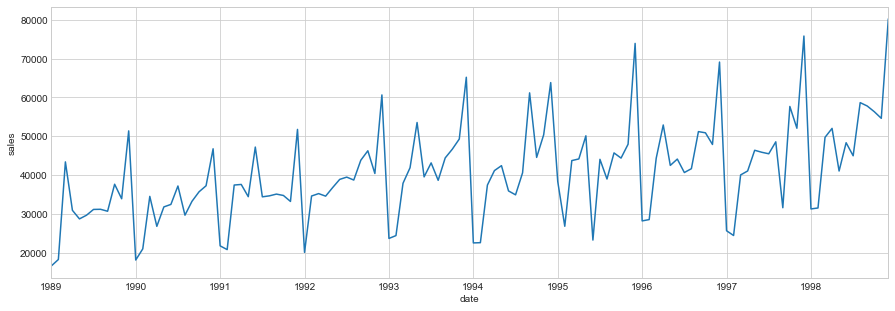

In [3]:
# Visualize target
h.plot_series(y, xlabel=y.index.name, ylabel="sales")

## Train/test split

In [4]:
y_train = y[:"1997"]
y_test = y["1998"]

## Linear Trend model

### Linear trend

R-squared:               0.0039
Root mean squared error: 12137.2745
Mean absolute error:     9012.3258


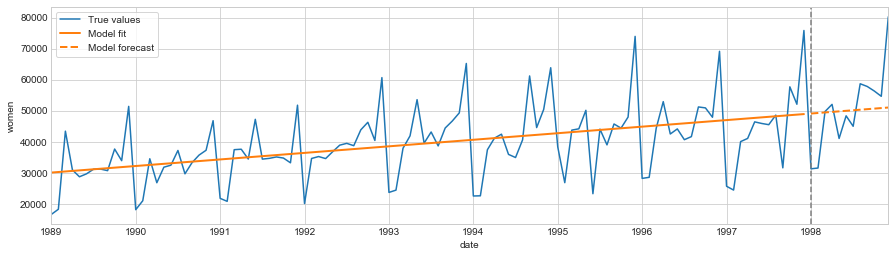

In [5]:
# Instantiante and train model
model = LinearTrend(y=y_train)
model.fit_ts()

# Predict and forecast
y_pred = model.predict_ts()
y_fcst = model.forecast_ts(steps=12)

# Evaluate model on test set
h.eval_model(y_test, y_fcst)

# Visualize prediction and forecast
h.plot_model(y, y_pred, y_fcst, xlabel=y.index.name, ylabel=y.name)

In [6]:
# Model interpretation
print("Increase by month: {:.2f}".format(model.coef_[0]))

Increase by month: 176.02


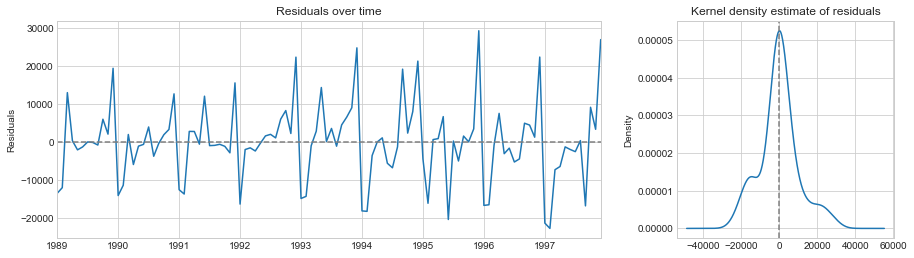

In [8]:
# Plot residuals
h.plot_residuals(y_train-y_pred)

### Trend with 2 polynomials

R-squared:               0.0405
Root mean squared error: 12642.8424
Mean absolute error:     9584.0112


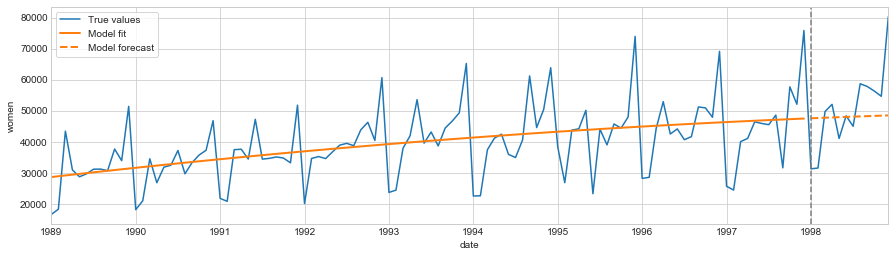

In [9]:
# Instantiante and train model
model = LinearTrend(y=y_train, polynomials=2)
model.fit_ts()

# Predict and forecast
y_pred = model.predict_ts()
y_fcst = model.forecast_ts(steps=12)

# Evaluate model on test set
h.eval_model(y_test, y_fcst)

# Visualize prediction and forecast
h.plot_model(y, y_pred, y_fcst, xlabel=y.index.name, ylabel=y.name)

### Trend with 3 polynomials

R-squared:               0.0208
Root mean squared error: 11604.2023
Mean absolute error:     8434.0264


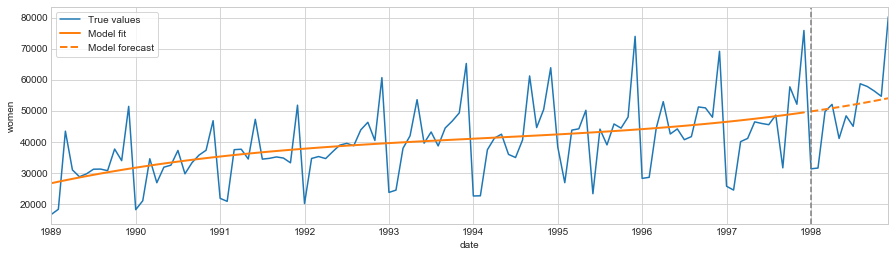

In [10]:
# Instantiante and train model
model = LinearTrend(y=y_train, polynomials=3)
model.fit_ts()

# Predict and forecast
y_pred = model.predict_ts()
y_fcst = model.forecast_ts(steps=12)

# Evaluate model on test set
h.eval_model(y_test, y_fcst)

# Visualize prediction and forecast
h.plot_model(y, y_pred, y_fcst, xlabel=y.index.name, ylabel=y.name)